In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import MinMaxScaler


In [2]:
airlines_data=pd.read_excel('EastWestAirlines (1).xlsx',sheet_name= 1)
airlines_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
airlines_data.shape

(3999, 12)

In [4]:
airlines_data.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [5]:
airlines_data.nunique()

ID#                  3999
Balance              3904
Qual_miles            164
cc1_miles               5
cc2_miles               3
cc3_miles               5
Bonus_miles          2734
Bonus_trans            57
Flight_miles_12mo     343
Flight_trans_12        35
Days_since_enroll    2820
Award?                  2
dtype: int64

In [6]:
airlines_data.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [7]:
airlines_data.drop(['ID#', 'Balance','Award?'],axis= 1 ,inplace= True)

In [8]:
airlines_data.head(20)

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0,1,1,1,174,1,0,0,7000
1,0,1,1,1,215,2,0,0,6968
2,0,1,1,1,4123,4,0,0,7034
3,0,1,1,1,500,1,0,0,6952
4,0,4,1,1,43300,26,2077,4,6935
5,0,1,1,1,0,0,0,0,6942
6,0,3,1,1,27482,25,0,0,6994
7,0,1,1,1,5250,4,250,1,6938
8,0,3,2,1,1753,43,3850,12,6948
9,0,3,1,1,28426,28,1150,3,6931


#  KMeans Clustering 

In [9]:
scaler = MinMaxScaler()
airlines_scaled = scaler.fit_transform(airlines_data)

In [10]:
airlines_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.84374246],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.83988425],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.84784181],
       ...,
       [0.        , 0.5       , 0.        , ..., 0.        , 0.        ,
        0.16879672],
       [0.        , 0.        , 0.        , ..., 0.01622481, 0.01886792,
        0.16867615],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.16831444]])

In [11]:
model = KMeans(n_clusters=5 ,init='k-means++',max_iter=600,algorithm= 'auto')
model.fit(airlines_scaled)

KMeans(max_iter=600, n_clusters=5)

In [12]:
pred = model.predict(airlines_scaled)
pred

array([1, 1, 1, ..., 3, 2, 2])

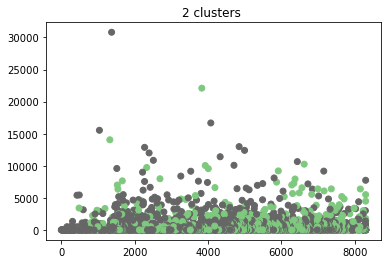

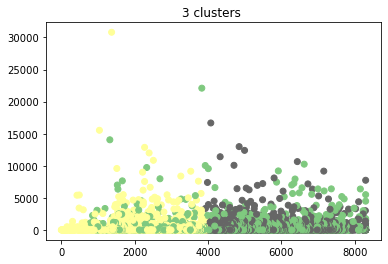

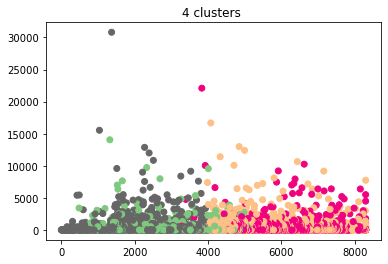

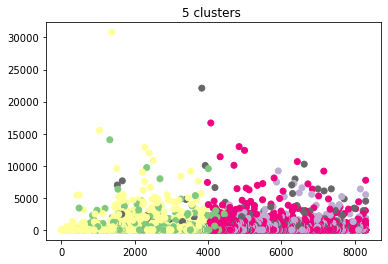

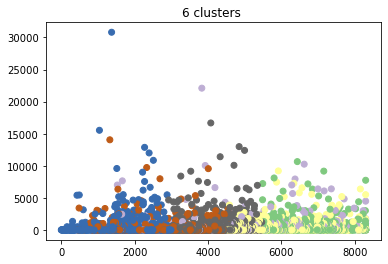

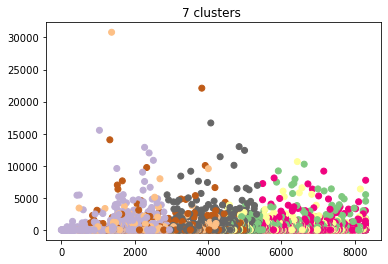

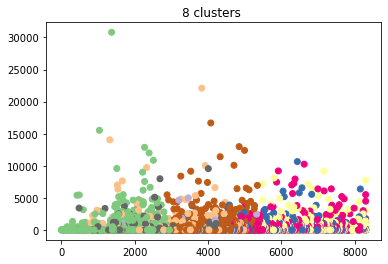

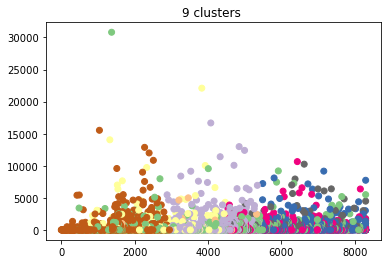

In [13]:
for i in range(2,10):
    model = KMeans(n_clusters=i, max_iter=600, algorithm = 'auto',init="k-means++",)
    model.fit(airlines_scaled)    
    pred=model.predict(airlines_scaled)    
    plt.scatter(airlines_data['Days_since_enroll'],airlines_data['Flight_miles_12mo'],c=pred,cmap=plt.cm.Accent_r)
    plt.title(str(i)+ " clusters ")
    plt.show()


In [14]:
Clusters = pd.DataFrame(pred,columns=['Clusters'])
Clusters

,Clusters
0,3
1,3
2,3
3,3
4,8
...,...
3994,1
3995,1
3996,7
3997,1


In [15]:
Clusters.nunique()

Clusters    9
dtype: int64

In [16]:
airlines_data['Clusters'] = Clusters

In [17]:
airlines_data

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Clusters
0,0,1,1,1,174,1,0,0,7000,3
1,0,1,1,1,215,2,0,0,6968,3
2,0,1,1,1,4123,4,0,0,7034,3
3,0,1,1,1,500,1,0,0,6952,3
4,0,4,1,1,43300,26,2077,4,6935,8
...,...,...,...,...,...,...,...,...,...,...
3994,0,1,1,1,8525,4,200,1,1403,1
3995,0,1,1,1,981,5,0,0,1395,1
3996,0,3,1,1,25447,8,0,0,1402,7
3997,0,1,1,1,500,1,500,1,1401,1


In [18]:
airlines_data[airlines_data['Clusters']== 1]

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Clusters
1129,0,1,1,1,1375,4,0,0,1547,1
1565,0,1,1,1,675,6,500,2,2818,1
1952,0,1,1,1,1413,9,0,0,2895,1
2041,0,1,1,1,15148,3,0,0,269,1
2106,0,1,1,1,1000,1,0,0,2515,1
...,...,...,...,...,...,...,...,...,...,...
3993,0,1,1,1,365,3,0,0,1397,1
3994,0,1,1,1,8525,4,200,1,1403,1
3995,0,1,1,1,981,5,0,0,1395,1
3997,0,1,1,1,500,1,500,1,1401,1


In [19]:
airlines_data[airlines_data['Clusters']== 2]

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Clusters
6,0,3,1,1,27482,25,0,0,6994,2
8,0,3,2,1,1753,43,3850,12,6948,2
9,0,3,1,1,28426,28,1150,3,6931,2
10,0,2,1,1,7278,10,0,0,6959,2
12,0,2,1,1,11150,20,0,0,6924,2
...,...,...,...,...,...,...,...,...,...,...
2003,0,3,1,1,19557,18,0,0,4599,2
2009,0,3,1,1,26465,22,1800,4,4537,2
2010,0,3,1,1,15681,14,0,0,4547,2
2044,0,3,1,1,14344,14,0,0,4610,2


In [20]:
airlines_data[airlines_data['Clusters']== 3]

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Clusters
0,0,1,1,1,174,1,0,0,7000,3
1,0,1,1,1,215,2,0,0,6968,3
2,0,1,1,1,4123,4,0,0,7034,3
3,0,1,1,1,500,1,0,0,6952,3
5,0,1,1,1,0,0,0,0,6942,3
...,...,...,...,...,...,...,...,...,...,...
1263,0,1,1,1,1,3,0,0,5461,3
1264,0,1,1,1,3105,6,100,2,5455,3
1265,0,1,1,1,2402,13,0,0,5449,3
1267,0,1,1,1,4500,15,0,0,5442,3


In [21]:
airlines_data[airlines_data['Clusters']== 4]

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Clusters
1327,0,4,1,1,44133,16,0,0,4313,4
1425,1739,4,1,1,48670,19,500,2,4352,4
1481,0,4,1,1,45312,18,0,0,4471,4
1519,0,4,1,1,32774,13,500,1,4300,4
1547,2139,4,1,1,52013,31,4309,12,4469,4
...,...,...,...,...,...,...,...,...,...,...
3908,0,4,1,1,52176,15,0,0,1564,4
3917,0,4,1,1,65510,37,6349,7,1545,4
3930,0,4,1,1,44110,26,343,3,1523,4
3966,0,4,1,1,37840,18,0,0,1444,4


In [ ]:
airlines_data[airlines_data['Clusters']== 5].head()

In [23]:
airlines_data[airlines_data['Clusters']== 6]

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Clusters
804,0,1,1,1,0,0,0,0,5119,6
920,0,1,1,1,0,0,0,0,5393,6
921,0,1,1,1,2125,2,0,0,5405,6
981,0,1,1,1,6893,9,0,0,5279,6
982,0,1,1,1,2815,6,0,0,5266,6
...,...,...,...,...,...,...,...,...,...,...
3781,0,1,1,1,5101,12,0,0,3488,6
3782,0,1,1,1,8102,12,2850,6,3279,6
3786,0,1,1,1,3219,7,0,0,3413,6
3790,0,1,1,1,358,4,358,4,3237,6


In [24]:
airlines_data[airlines_data['Clusters']== 7]

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Clusters
1424,0,3,1,1,14857,11,200,1,2587,7
1473,0,3,1,1,21704,14,0,0,4023,7
1545,6920,3,1,1,20443,18,1310,4,3916,7
1549,0,2,1,1,10369,12,0,0,3547,7
1555,0,3,1,1,16331,15,350,1,3544,7
...,...,...,...,...,...,...,...,...,...,...
3978,0,2,1,1,27701,16,0,0,1421,7
3979,0,3,1,1,20959,15,1198,3,1424,7
3980,0,3,1,1,19169,28,0,0,1425,7
3991,0,3,1,1,14981,28,0,0,1408,7


In [25]:
airlines_data[airlines_data['Clusters']== 8]

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Clusters
4,0,4,1,1,43300,26,2077,4,6935,8
15,0,4,1,1,49442,15,0,0,6912,8
16,0,4,1,1,48963,16,0,0,6910,8
32,0,4,1,1,42044,23,0,0,7872,8
35,0,4,1,1,50572,23,2500,5,7865,8
...,...,...,...,...,...,...,...,...,...,...
1746,0,4,1,1,26669,14,0,0,4505,8
1958,0,4,1,1,37625,14,0,0,4510,8
1997,0,4,1,1,48874,16,0,0,4530,8
2002,0,4,1,1,35847,13,0,0,4476,8


In [26]:
airlines_data[airlines_data['Clusters']== 9]

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Clusters


#  Hierarchical Clustering. 

####  Library Importing 

In [27]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MaxAbsScaler

In [28]:
airlines_data.drop(['Clusters'],axis=1)

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0,1,1,1,174,1,0,0,7000
1,0,1,1,1,215,2,0,0,6968
2,0,1,1,1,4123,4,0,0,7034
3,0,1,1,1,500,1,0,0,6952
4,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...
3994,0,1,1,1,8525,4,200,1,1403
3995,0,1,1,1,981,5,0,0,1395
3996,0,3,1,1,25447,8,0,0,1402
3997,0,1,1,1,500,1,500,1,1401


In [29]:
airlines_data.columns

Index(['Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles', 'Bonus_miles',
       'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Clusters'],
      dtype='object')

In [30]:
scaler = MaxAbsScaler()
airlines_scaled_hierarchial = scaler.fit_transform(airlines_data)

In [31]:
airlines_scaled_hierarchial

array([[0.        , 0.2       , 0.33333333, ..., 0.        , 0.84378014,
        0.375     ],
       [0.        , 0.2       , 0.33333333, ..., 0.        , 0.83992285,
        0.375     ],
       [0.        , 0.2       , 0.33333333, ..., 0.        , 0.8478785 ,
        0.375     ],
       ...,
       [0.        , 0.6       , 0.33333333, ..., 0.        , 0.16899711,
        0.875     ],
       [0.        , 0.2       , 0.33333333, ..., 0.01886792, 0.16887657,
        0.125     ],
       [0.        , 0.2       , 0.33333333, ..., 0.        , 0.16851495,
        0.125     ]])

In [32]:
df_norm = pd.DataFrame(airlines_scaled_hierarchial)
df_norm

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.2,0.333333,0.2,0.000660,0.011628,0.000000,0.000000,0.843780,0.375
1,0.0,0.2,0.333333,0.2,0.000815,0.023256,0.000000,0.000000,0.839923,0.375
2,0.0,0.2,0.333333,0.2,0.015636,0.046512,0.000000,0.000000,0.847878,0.375
3,0.0,0.2,0.333333,0.2,0.001896,0.011628,0.000000,0.000000,0.837994,0.375
4,0.0,0.8,0.333333,0.2,0.164211,0.302326,0.067398,0.075472,0.835945,1.000
...,...,...,...,...,...,...,...,...,...,...
3994,0.0,0.2,0.333333,0.2,0.032330,0.046512,0.006490,0.018868,0.169118,0.125
3995,0.0,0.2,0.333333,0.2,0.003720,0.058140,0.000000,0.000000,0.168153,0.125
3996,0.0,0.6,0.333333,0.2,0.096505,0.093023,0.000000,0.000000,0.168997,0.875
3997,0.0,0.2,0.333333,0.2,0.001896,0.011628,0.016225,0.018868,0.168877,0.125


{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [55.0, 55.0, 65.0, 65.0],
  [75.0, 75.0, 85.0, 85.0],
  [60.0, 60.0, 80.0, 80.0],
  [32.5, 32.5, 70.0, 70.0],
  [15.0, 15.0, 51.25, 51.25],
  [5.0, 5.0, 33.125, 33.125],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [19.0625, 19.0625, 102.5, 102.5],
  [125.0, 125.0, 135.0, 135.0],
  [145.0, 145.0, 155.0, 155.0],
  [130.0, 130.0, 150.0, 150.0],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [205.0, 205.0, 222.5, 222.5],
  [195.0, 195.0, 213.75, 213.75],
  [172.5, 172.5, 204.375, 204.375],
  [140.0, 140.0, 188.4375, 188.4375],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [255.0, 255.0, 272.5, 272.5],
  [245.0, 245.0, 263.75, 263.75],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [325.0, 325.0, 335.0, 335.0],
  [345.0, 345.0, 355.0, 355.0],
  [375.0, 375.0, 385.0, 385.0],
  [365.0, 

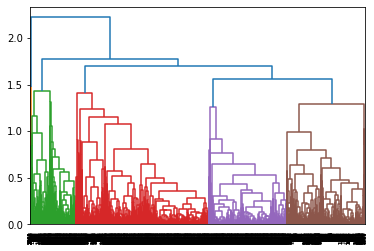

In [33]:
# Create dendogram 
dendrogram = sch.dendrogram(sch.linkage(df_norm,method='complete',metric='euclidean'))
dendrogram

In [34]:
hc = AgglomerativeClustering(n_clusters=9, affinity = 'cosine', linkage = 'single')

In [35]:
pred_hc = hc.fit_predict(df_norm)
pred_hc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
Clusters_hi=pd.DataFrame(pred_hc,columns=['Clusters'])
Clusters_hi

,Clusters
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [37]:
Clusters_hi.nunique()

Clusters    9
dtype: int64

In [38]:
airlines_data['Clusters_hi'] = Clusters_hi
airlines_data

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Clusters,Clusters_hi
0,0,1,1,1,174,1,0,0,7000,3,0
1,0,1,1,1,215,2,0,0,6968,3,0
2,0,1,1,1,4123,4,0,0,7034,3,0
3,0,1,1,1,500,1,0,0,6952,3,0
4,0,4,1,1,43300,26,2077,4,6935,8,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0,1,1,1,8525,4,200,1,1403,1,0
3995,0,1,1,1,981,5,0,0,1395,1,0
3996,0,3,1,1,25447,8,0,0,1402,7,0
3997,0,1,1,1,500,1,500,1,1401,1,0


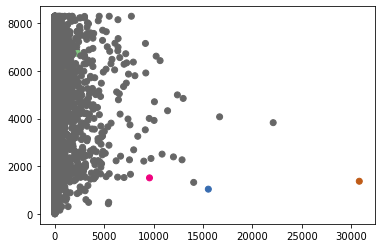

In [39]:
scatter_plot=plt.scatter(airlines_data['Flight_miles_12mo'], airlines_data['Days_since_enroll'], c=pred_hc , cmap=plt.cm.Accent_r )

In [40]:
airlines_data[airlines_data['Clusters_hi']== 0]

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Clusters,Clusters_hi
0,0,1,1,1,174,1,0,0,7000,3,0
1,0,1,1,1,215,2,0,0,6968,3,0
2,0,1,1,1,4123,4,0,0,7034,3,0
3,0,1,1,1,500,1,0,0,6952,3,0
4,0,4,1,1,43300,26,2077,4,6935,8,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0,1,1,1,8525,4,200,1,1403,1,0
3995,0,1,1,1,981,5,0,0,1395,1,0
3996,0,3,1,1,25447,8,0,0,1402,7,0
3997,0,1,1,1,500,1,500,1,1401,1,0


In [41]:
airlines_data[airlines_data['Clusters_hi']== 1]

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Clusters,Clusters_hi
3583,500,1,1,1,71954,86,30817,53,1373,7,1


In [42]:
airlines_data[airlines_data['Clusters_hi']== 2]

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Clusters,Clusters_hi
3934,0,1,1,1,10577,2,9577,1,1515,1,2


In [43]:
airlines_data[airlines_data['Clusters_hi']== 3]

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Clusters,Clusters_hi
3463,0,1,1,1,19633,23,15533,17,1041,1,3


In [44]:
airlines_data[airlines_data['Clusters_hi']== 4]

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Clusters,Clusters_hi
901,9325,5,1,1,21382,23,950,3,5944,0,4


In [45]:
airlines_data[airlines_data['Clusters_hi']== 5]

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Clusters,Clusters_hi
3338,0,1,1,5,84148,7,0,0,1054,1,5


In [46]:
airlines_data[airlines_data['Clusters_hi']== 6]

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Clusters,Clusters_hi
904,0,2,1,5,112171,16,0,0,5825,2,6


In [47]:
airlines_data[airlines_data['Clusters_hi']== 7]

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Clusters,Clusters_hi
2840,0,1,1,1,200622,5,622,3,1955,1,7


In [48]:
airlines_data[airlines_data['Clusters_hi']== 8]

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Clusters,Clusters_hi
106,1182,1,1,3,49059,26,2300,9,6738,3,8


In [49]:
airlines_data[airlines_data['Clusters_hi']== 9]

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Clusters,Clusters_hi


# DB SCAN 

In [50]:
from sklearn.cluster import DBSCAN 

In [51]:
DBSCAN_data =df_norm
DBSCAN_data

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.2,0.333333,0.2,0.000660,0.011628,0.000000,0.000000,0.843780,0.375
1,0.0,0.2,0.333333,0.2,0.000815,0.023256,0.000000,0.000000,0.839923,0.375
2,0.0,0.2,0.333333,0.2,0.015636,0.046512,0.000000,0.000000,0.847878,0.375
3,0.0,0.2,0.333333,0.2,0.001896,0.011628,0.000000,0.000000,0.837994,0.375
4,0.0,0.8,0.333333,0.2,0.164211,0.302326,0.067398,0.075472,0.835945,1.000
...,...,...,...,...,...,...,...,...,...,...
3994,0.0,0.2,0.333333,0.2,0.032330,0.046512,0.006490,0.018868,0.169118,0.125
3995,0.0,0.2,0.333333,0.2,0.003720,0.058140,0.000000,0.000000,0.168153,0.125
3996,0.0,0.6,0.333333,0.2,0.096505,0.093023,0.000000,0.000000,0.168997,0.875
3997,0.0,0.2,0.333333,0.2,0.001896,0.011628,0.016225,0.018868,0.168877,0.125


In [52]:
dbs=DBSCAN(min_samples=5,eps=0.2)
DBSCAN_pred =dbs.fit_predict(DBSCAN_data)

In [53]:
DBSCAN_pred

array([ 0,  0,  0, ..., 11,  7,  7], dtype=int64)

In [54]:
DBSCAN_data['DBSCAN_pred'] = DBSCAN_pred

In [56]:
DBSCAN_data

,0,1,2,3,4,5,6,7,8,9,DBSCAN_pred
0,0.0,0.2,0.333333,0.2,0.000660,0.011628,0.000000,0.000000,0.843780,0.375,0
1,0.0,0.2,0.333333,0.2,0.000815,0.023256,0.000000,0.000000,0.839923,0.375,0
2,0.0,0.2,0.333333,0.2,0.015636,0.046512,0.000000,0.000000,0.847878,0.375,0
3,0.0,0.2,0.333333,0.2,0.001896,0.011628,0.000000,0.000000,0.837994,0.375,0
4,0.0,0.8,0.333333,0.2,0.164211,0.302326,0.067398,0.075472,0.835945,1.000,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.0,0.2,0.333333,0.2,0.032330,0.046512,0.006490,0.018868,0.169118,0.125,7
3995,0.0,0.2,0.333333,0.2,0.003720,0.058140,0.000000,0.000000,0.168153,0.125,7
3996,0.0,0.6,0.333333,0.2,0.096505,0.093023,0.000000,0.000000,0.168997,0.875,11
3997,0.0,0.2,0.333333,0.2,0.001896,0.011628,0.016225,0.018868,0.168877,0.125,7


Text(0, 0.5, 'Days_since_enroll')

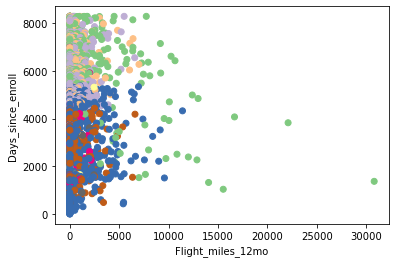

In [57]:
import matplotlib.pyplot as plt 
plt.scatter(airlines_data['Flight_miles_12mo'], airlines_data['Days_since_enroll'], c=DBSCAN_pred , cmap=plt.cm.Accent )
plt.xlabel("Flight_miles_12mo")
plt.ylabel("Days_since_enroll")